# Installing packages and Importing Libraries

In [6]:
!pip install beautifulsoup4

In [7]:
!pip install lxml

In [ ]:
import bs4 as bs
import urllib.request
import re
import nltk, string, numpy as np
#nltk.download('wordnet') # first-time use only
#nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import math
import pandas as pd
import networkx as nx
from networkx.generators.small import krackhardt_kite_graph
from string import ascii_lowercase

### Select two different English translations of the Quran, of the same Surah 

In [5]:
def abstractExtracter(url_to_go):
  scraped_data = urllib.request.urlopen(url_to_go)
  article = scraped_data.read()

  parsed_article = bs.BeautifulSoup(article,'lxml')

  paragraphs = parsed_article.find_all(id='p-2')

  article_text = ""

  for p in paragraphs:
      article_text += p.text
  return article_text


# here are two translations of the same part of a Surah, each by a different translator
#By  Shakir
abstract1 =  "In the name of Allah, the Beneficent, the Merciful .All praise is due to Allah, the Lord of the Worlds.The Beneficent, the Merciful. Master of the Day of Judgment. Thee do we serve and Thee do we beseech for help. Keep us on the right path. The path of those upon whom Thou hast bestowed favors. Not (the path) of those upon whom Thy wrath is brought down, nor of those who go astray. Alif Lam Mim.This Book, there is no doubt in it, is a guide to those who guard (against evil). Those who believe in the unseen and keep up prayer and spend out of what We have given them. And who believe in that which has been revealed to you and that which was revealed before you and they are sure of the hereafter. These are on a right course from their Lord and these it is that shall be successful. Surely those who disbelieve, it being alike to them whether you warn them, or do not warn them, will not believe.Allah has set a seal upon their hearts and upon their hearing and there is a covering over their eyes, and there is a great punishment for them. And there are some people who say: We believe in Allah and the last day; and they are not at all believers. They desire to deceive Allah and those who believe, and they deceive only themselves and they do not perceive. There is a disease in their hearts, so Allah added to their disease and they shall have a painful chastisement because they lied. And when it is said to them, Do not make mischief in the land, they say: We are but peace-makers. Now surely they themselves are the mischief makers, but they do not perceive. And when it is said to them: Believe as the people believe, they say: Shall we believe as the fools believe? Now surely they themselves are the fools, but they do not know. And when they meet those who believe, they say: We believe; and when they are alone with their Shaitans, they say: Surely we are with you, we were only mocking. Allah shall pay them back their mockery, and He leaves them alone in their inordinacy, blindly wandering on. These are they who buy error for the right direction, so their bargain shall bring no gain, nor are they the followers of the right direction. Their parable is like the parable of one who kindled a fire, but when it had illumined all around him, Allah took away their light, and left them in utter darkness-- they do not see. Deaf, dumb (and) blind, so they will not turn back"

# By Sarwar
abstract2 = "In the Name of Allah, the Beneficent, the Merciful. All praise belongs to God, Lord of the Universe,the Beneficent, the Merciful and Master of the Day of Judgment (Lord), You alone We do worship and from You alone we do seek assistance (Lord), guide us to the right path, the path of those to whom You have granted blessings, those who are neither subject to Your anger nor have gone astray. Alif. Lam. Mim. There is no doubt that this book is a guide for the pious; the pious who believe in the unseen, attend to prayer, give in charity part of what We have granted them; who have faith in what has been revealed to you and others before you and have strong faith in the life hereafter. It is the pious who follow the guidance of their Lord and gain lasting happiness. Those who deny your message will not believe whether you warn them or not. God has sealed their hearts and hearing and their vision is veiled; a great punishment awaits them. Some people say, We believe in God and the Day of Judgment, but they are not true believers. They deceive God and the believers. However, they have deceived no one but themselves, a fact of which they are not aware. A sickness exists in their hearts to which God adds more sickness. Besides this, they will suffer a painful punishment as a result of the lie which they speak.When they are told not to commit corruption in the land, they reply, We are only reformers. They, certainly, are corrupt but do not realize it. When they are told to believe as everyone else does, they say, Should we believe as fools do? In fact, they themselves are fools, but they do not know it. To the believers they declare belief and, in secret to their own devils, they say, We were only mocking. God mocks them and gives them time to continue blindly in their transgressions. They have traded guidance for error, but their bargain has had no profit and they have missed the true guidance. (Their case) is like that of one who kindles a fire and when it grows bright God takes away its light leaving him in darkness (wherein) he cannot see (anything). They are deaf, blind, and dumb and cannot regain their senses."




In [6]:
print('ABSTRACT # 1: ', abstract1)

print('\n-----------\n')

print('ABSTRACT # 2: ',abstract2)

print('\n-----------\n')



ABSTRACT # 1:  In the name of Allah, the Beneficent, the Merciful .All praise is due to Allah, the Lord of the Worlds.The Beneficent, the Merciful. Master of the Day of Judgment. Thee do we serve and Thee do we beseech for help. Keep us on the right path. The path of those upon whom Thou hast bestowed favors. Not (the path) of those upon whom Thy wrath is brought down, nor of those who go astray. Alif Lam Mim.This Book, there is no doubt in it, is a guide to those who guard (against evil). Those who believe in the unseen and keep up prayer and spend out of what We have given them. And who believe in that which has been revealed to you and that which was revealed before you and they are sure of the hereafter. These are on a right course from their Lord and these it is that shall be successful. Surely those who disbelieve, it being alike to them whether you warn them, or do not warn them, will not believe.Allah has set a seal upon their hearts and upon their hearing and there is a coveri

In [7]:
d1 = abstract1
d2 = abstract2
documents = [d1, d2]

# Data Preprocessing

In [8]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [9]:
LemVectorizer = CountVectorizer(tokenizer=LemNormalize, stop_words='english')
LemVectorizer.fit_transform(documents)

<2x172 sparse matrix of type '<class 'numpy.int64'>'
	with 219 stored elements in Compressed Sparse Row format>

In [10]:
LemVectorizer.vocabulary_

{'allah': 4,
 'beneficent': 18,
 'merciful': 102,
 'praise': 119,
 'lord': 97,
 'worldsthe': 169,
 'master': 100,
 'day': 40,
 'judgment': 82,
 'thee': 150,
 'serve': 137,
 'beseech': 19,
 'help': 79,
 'u': 160,
 'right': 129,
 'path': 113,
 'thou': 151,
 'hast': 76,
 'bestowed': 20,
 'favor': 60,
 'thy': 152,
 'wrath': 171,
 'brought': 27,
 'astray': 7,
 'alif': 2,
 'lam': 86,
 'mimthis': 105,
 'book': 24,
 'doubt': 52,
 'guide': 73,
 'guard': 71,
 'evil': 55,
 'believe': 14,
 'unseen': 162,
 'prayer': 120,
 'spend': 143,
 'given': 65,
 'ha': 74,
 'revealed': 128,
 'wa': 166,
 'sure': 148,
 'course': 37,
 'shall': 140,
 'successful': 146,
 'surely': 149,
 'disbelieve': 49,
 'alike': 3,
 'warn': 168,
 'believeallah': 15,
 'set': 138,
 'seal': 132,
 'heart': 78,
 'hearing': 77,
 'covering': 38,
 'eye': 57,
 'great': 69,
 'punishment': 122,
 'people': 116,
 'say': 131,
 'believer': 16,
 'desire': 46,
 'deceive': 42,
 'perceive': 117,
 'disease': 50,
 'added': 1,
 'painful': 111,
 'chasti

# TF_IDF Calculations

In [11]:
tf_matrix = LemVectorizer.transform(documents).toarray()
print (tf_matrix)

[[ 0  1  1  1  7  0  0  1  0  0  0  1  1  0 10  1  1  0  2  1  1  0  1  1
   1  0  1  1  1  0  0  0  1  0  0  0  0  1  1  1  2  1  2  0  0  0  1  0
   2  1  2  0  1  1  1  1  0  1  0  0  1  0  1  2  1  1  0  0  0  1  0  1
   0  1  2  0  1  1  2  1  1  1  1  1  0  1  1  1  0  1  0  1  0  1  0  1
   1  2  1  1  1  1  2  0  0  1  2  0  0  1  1  1  2  3  1  1  2  2  0  1
   1  0  1  0  0  0  0  0  2  4  2  5  1  0  0  0  0  1  1  1  5  0  0  1
   0  0  1  0  1  4  2  1  1  0  0  1  0  0  0  1  1  0  1  1  0  0  1  1
   2  1  0  1]
 [ 1  0  1  0  1  1  1  1  1  1  1  1  1  1  5  0  3  1  2  0  0  1  1  1
   1  1  0  0  0  1  1  1  0  1  1  1  1  0  0  1  2  1  1  1  1  1  0  1
   0  0  0  1  1  1  1  0  1  0  2  2  0  1  0  2  1  0  7  1  2  1  1  0
   3  2  3  1  0  1  2  0  0  0  2  0  1  1  1  1  1  0  1  0  1  0  1  1
   1  4  0  0  1  0  2  1  1  0  0  1  1  0  1  1  0  2  0  0  1  0  3  1
   1  1  2  1  1  1  1  1  1  1  0  3  0  1  1  1  1  0  0  0  0  2  1  0
   1  1  0  1  0  0  0 

In [12]:
tf_matrix.shape

(2, 172)

In [13]:
tfidfTran = TfidfTransformer(norm="l2")
tfidfTran.fit(tf_matrix)
print (tfidfTran.idf_)

[1.40546511 1.40546511 1.         1.40546511 1.         1.40546511
 1.40546511 1.         1.40546511 1.40546511 1.40546511 1.
 1.         1.40546511 1.         1.40546511 1.         1.40546511
 1.         1.40546511 1.40546511 1.40546511 1.         1.
 1.         1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.         1.         1.
 1.         1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.         1.
 1.         1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.         1.         1.40546511
 1.40546511 1.40546511 1.40546511 1.         1.40546511 1.40546511
 1.40546511 1.         1.         1.40546511 1.40546511 1.
 1.         1.40546511 1.40546511 1.40546511 1.         1.40546511
 1.40546511 1.         1.         1.         1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1

In [14]:
def idf(n,df):
    result = math.log((n+1.0)/(df+1.0)) + 1
    return result
print( "The idf for terms that appear in one document: " + str(idf(4,1)))
print( "The idf for terms that appear in two documents: " + str(idf(4,2)))

The idf for terms that appear in one document: 1.916290731874155
The idf for terms that appear in two documents: 1.5108256237659907


In [15]:
tfidf_matrix = tfidfTran.transform(tf_matrix)
print (tfidf_matrix.toarray())

[[0.         0.0622922  0.04432141 0.0622922  0.31024988 0.
  0.         0.04432141 0.         0.         0.         0.04432141
  0.04432141 0.         0.44321411 0.0622922  0.04432141 0.
  0.08864282 0.0622922  0.0622922  0.         0.04432141 0.04432141
  0.04432141 0.         0.0622922  0.0622922  0.0622922  0.
  0.         0.         0.0622922  0.         0.         0.
  0.         0.0622922  0.0622922  0.04432141 0.08864282 0.04432141
  0.08864282 0.         0.         0.         0.0622922  0.
  0.12458439 0.0622922  0.12458439 0.         0.04432141 0.04432141
  0.04432141 0.0622922  0.         0.0622922  0.         0.
  0.0622922  0.         0.0622922  0.08864282 0.04432141 0.0622922
  0.         0.         0.         0.04432141 0.         0.0622922
  0.         0.04432141 0.08864282 0.         0.0622922  0.04432141
  0.08864282 0.0622922  0.0622922  0.0622922  0.04432141 0.0622922
  0.         0.04432141 0.04432141 0.04432141 0.         0.0622922
  0.         0.0622922  0.      

# Cosine Similarity Matrix

In [20]:
cos_similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()
print (cos_similarity_matrix)

[[1.         0.34223802]
 [0.34223802 1.        ]]


In [21]:
df = pd.DataFrame(cos_similarity_matrix, index= ['doc1','doc2'], columns=['doc1','doc2'])
df

,doc1,doc2
doc1,1.000000,0.342238
doc2,0.342238,1.000000


In [22]:
df.to_csv('sim_matrix.csv')

In [23]:
cos_similarity_matrix

array([[1.        , 0.34223802],
       [0.34223802, 1.        ]])

# Similarity Network Graph 

{0: Text(0.9999999999999998, 0.45501880346503965, 'a'),
 1: Text(-0.9999999999999999, -0.45501880346503965, 'b')}

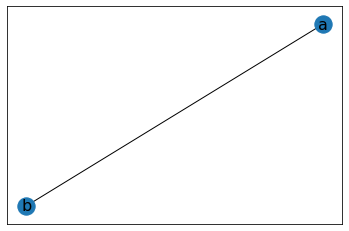

In [24]:

G = nx.from_numpy_matrix(np.array(cos_similarity_matrix))
pos=nx.spring_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = ascii_lowercase[idx]
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=16)